<a href="https://colab.research.google.com/github/Hidayathamir/-Sentiment-Analysist-Indonlu-smsa_doc-sentiment-prosa-Dataset/blob/main/Sentiment_Analysist_Indonlu_smsa_doc_sentiment_prosa_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from random import randint

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Hidayathamir/Preprocess-Indonlu-smsa_doc-sentiment-prosa-Dataset-for-machine-learning/main/train.csv')
df_train

,text,sentiment
0,warung milik usaha pabrik puluh kenal putih ba...,positive
1,mohon ulama lurus k umbra hujah partai didih s...,neutral
2,lokasi strategis jalan sumatera bandung nya ny...,positive
3,betapa bahagia nya unboxing paket barang nya b...,positive
4,duh mahasiswa sombong kasih kartu kuning ajar ...,negative
...,...,...
10988,kecewa,positive
10989,enak masakan nya kepiting senang pilih kepitin...,positive
10990,hormat partai partai koalisi,neutral
10991,pagi pagi tol pasteur macet parah bikin jengkel,negative


In [3]:
df_valid = pd.read_csv('https://raw.githubusercontent.com/Hidayathamir/Preprocess-Indonlu-smsa_doc-sentiment-prosa-Dataset-for-machine-learning/main/valid.csv')
df_valid

,text,sentiment
0,kampanye selesai berat habis upaya kerek tingk...,neutral
1,enak,negative
2,restoran tawar makan sunda mes ayam goreng kan...,positive
3,lokasi alun alun masakan padang kenal kepala i...,positive
4,betapa bejat kader gerinda anggota dpr cabul a...,negative
...,...,...
1255,film uncu cocok tonton suka sadis,negative
1256,indihome mahal loh bayar nya tangan nya lambat,negative
1257,be de gera cowok cupu takut pacar nya pacar ny...,negative
1258,palen kualitas komentator nya didik jepret jep...,negative


In [4]:
df_train = df_train.dropna()

In [5]:
all_word = set()
for text in df_train['text']:
  for word in text.split():
    all_word.add(word)
len(all_word)

9883

6752


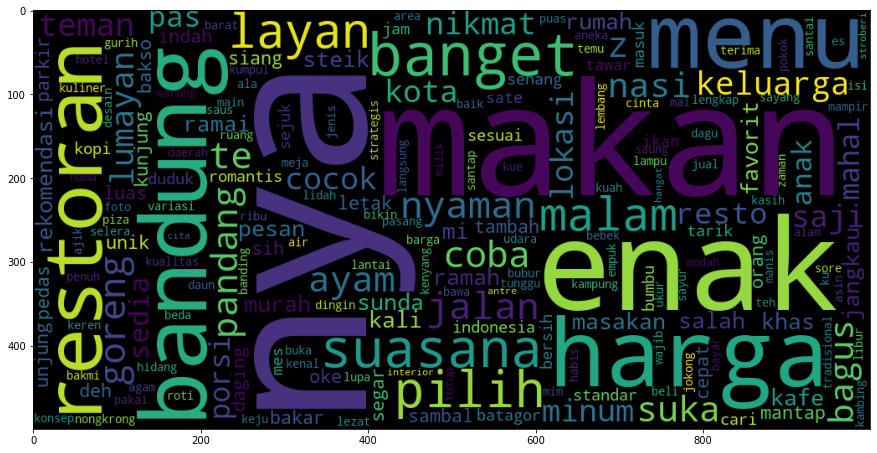

In [6]:
positive_word = []
for text in df_train[df_train['sentiment']=='positive']['text']:
  for word in text.split():
    positive_word.append(word)
x = Counter(positive_word)
print(len(x))
d = {k: v for k, v in sorted(x.items(), key=lambda item: item[0], reverse=False)}
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(d)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

5534


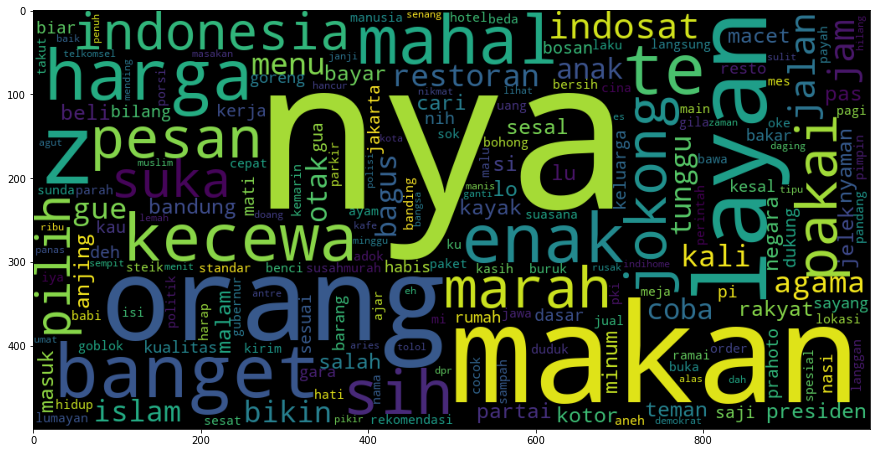

In [7]:
negative_word = []
for text in df_train[df_train['sentiment']=='negative']['text']:
  for word in text.split():
    negative_word.append(word)
x = Counter(negative_word)
print(len(x))
d = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(d)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

3433


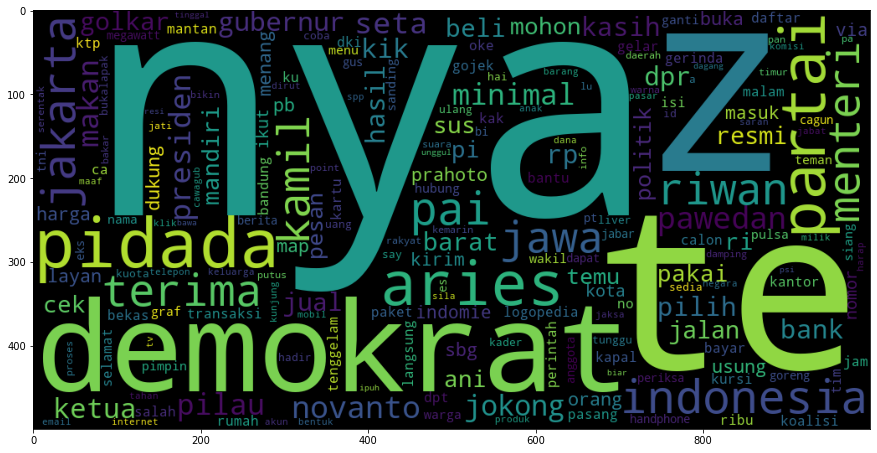

In [8]:
neutral_word = []
for text in df_train[df_train['sentiment']=='neutral']['text']:
  for word in text.split():
    neutral_word.append(word)
x = Counter(neutral_word)
print(len(x))
d = {k: v for k, v in sorted(x.items(), key=lambda item: item[1], reverse=True)}
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(d)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [9]:
tfidf = TfidfVectorizer(sublinear_tf=True, max_features=16000, min_df=1,
                        norm='l2', ngram_range=(1,2))
features = tfidf.fit_transform(df_train['text']).toarray()
y = df_train['sentiment']
features.shape

(10993, 16000)

In [10]:
valid_features = tfidf.transform(df_valid['text']).toarray()
valid_y = df_valid['sentiment']
for c in range(1, 11):
  model = LogisticRegression(max_iter=1000, C=c)
  model.fit(features, y)
  pred = model.predict(valid_features)
  acc = accuracy_score(pred, valid_y)
  print(c, acc)

1 0.8563492063492063
2 0.8603174603174604
3 0.8603174603174604
4 0.8603174603174604
5 0.8587301587301587
6 0.8579365079365079
7 0.8563492063492063
8 0.8555555555555555
9 0.8555555555555555
10 0.8563492063492063


In [16]:
model = LogisticRegression(max_iter=1000, C=2)
model.fit(features, y)
pred = model.predict(valid_features)
acc = accuracy_score(pred, valid_y)
print(acc)

0.8603174603174604


In [14]:
df_valid['pred'] = pred
df_valid

,text,sentiment,pred
0,kampanye selesai berat habis upaya kerek tingk...,neutral,negative
1,enak,negative,positive
2,restoran tawar makan sunda mes ayam goreng kan...,positive,positive
3,lokasi alun alun masakan padang kenal kepala i...,positive,positive
4,betapa bejat kader gerinda anggota dpr cabul a...,negative,negative
...,...,...,...
1255,film uncu cocok tonton suka sadis,negative,positive
1256,indihome mahal loh bayar nya tangan nya lambat,negative,negative
1257,be de gera cowok cupu takut pacar nya pacar ny...,negative,negative
1258,palen kualitas komentator nya didik jepret jep...,negative,positive


In [15]:
i = randint(0, df_valid.shape[0])
text = df_valid.iloc[i]['text']
sentiment = df_valid.iloc[i]['sentiment']
pred = df_valid.iloc[i]['pred']
print(text)
print(sentiment)
print(pred)

temu pb vietnam presiden jokong bahas kembang ekonomi kreatif digital kawasan
neutral
neutral
